In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import warnings

from sklearn.datasets import make_blobs, make_circles
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, zero_one_loss, confusion_matrix

warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
dtrain = pd.read_csv('/home/volkov/hard_mnist/hard_train.txt', header = None, sep = '\\s+')
dlabels = pd.read_csv('/home/volkov/hard_mnist/hard_train_labels.txt', header = None, sep = '\\s+')

In [ ]:
X_test = dtrain[10000:11000]
y_test = dlabels[10000:11000]

–ó–¥–µ—Å—å —Ä–µ–∞–ª–∏–∑–æ–≤–∞–Ω–∞ –≤—Å–ø–æ–º–æ–≥–∞—é—â–∞—è —Ñ—É–Ω–∫—Ü–∏—è, –∞ —Ç–∞–∫ –∂–µ —Ä–µ–∞–ª–∏–∑–∞—Ü–∏—è –∑–∞–ø—É—Å–∫ KNN –Ω–∞ 20 —Å–æ—Å–µ–¥—è—Ö –∏ –ø—è—Ç–∏ —Ä–∞–∑–Ω—ã—Ö –≤—ã–±–æ—Ä–∫–∞—Ö.

In [4]:
def knn_algorithm(X_train, y_train, X_test, y_test, start=0, end=-1, **kargs):
    X_train = X_train[start:end]
    y_train = y_train[start:end]
    start = time.time()
    model = KNeighborsClassifier(**kargs)
    model.fit(X_train, y_train)
    fraction_misclassifications = zero_one_loss(y_test, model.predict(X_test))
    end = time.time()
    return(fraction_misclassifications, end-start)

In [17]:
f = open('knn1.txt', 'a')
for j in range(1, 6):
    for i in range(1, 21):
        error_with_time = knn_algorithm(dtrain, dlabels, X_test, y_test, end=2000*j, n_neighbors=i, algorithm='brute')
        f.write(str(i) + ' ' + ' '.join(map(str, error_with_time)) + '\n')
f.close()

–¢—É—Ç –æ—Ç—Ä–∏—Å–æ–≤—ã–≤–∞–µ–º –≥—Ä–∞—Ñ–∏–∫–∏. –î–ª—è —ç—Ç–æ–≥–æ —Å–æ–∑–¥–∞–¥–∏–º 2 —Ñ—É–Ω–∫—Ü–∏–∏, –∫–æ—Ç–æ—Ä—ã–µ –ø–æ–ª—É–∞—é—Ç –Ω–∞ –≤—Ö–æ–¥ –ø—É—Ç—å –∫ —Ñ–∞–π–ª—É, –∞ –∑–∞—Ç–µ–º —Å —É—á–µ—Ç–æ–º —Å–ø–µ—Ü–∏—Ñ–∏–∫–∏ —Å–æ–∑—Ä–∞–Ω–Ω–µ–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –∏–∑–≤–ª–µ–∫–∞—é—Ç –∏—Ö –∏ –≤–æ–∑–≤—Ä–∞—â–∞—é—Ç –æ–±—ä–µ–∫—Ç plt.

In [66]:
def accuracy_drawer(file_path):
    f = pd.read_csv(file_path, header = None, sep = '\\s+')
    accuracy = 1 - np.array(f[:][0])
    k = range(1, 21)
    plt.figure(figsize=(14,8))
    plt.ylabel("accuracy", fontsize=15)
    plt.xlabel("k", fontsize=15)
    
    for i in range(5):
        plt.plot(k, accuracy[i*20:20*(i+1)])

    plt.legend(['size = 2000', 'size = 4000', 'size = 6000', 'size = 8000','size = 10000'], loc='down left')
    return(plt)


def time_drawer(file_path):
    f = pd.read_csv(file_path, header = None, sep = '\\s+')
    time = np.array(f[:][1])
    plt.figure(figsize=(14,8))
    plt.ylabel("time", fontsize=15)
    plt.xlabel("size of data set", fontsize=15)
    time_partition = [[time[20*i+j] for i in range(5)] for j in range(5)]
    size_of_data_set = [i*2000 for i in range(1, 6)]

    for i in range(5):
        plt.plot(size_of_data_set, time_partition[i])

    plt.legend(['k = 1', 'k = 2', 'k = 3', 'k = 4', 'k = 5'], loc='upper left')
    return(plt)

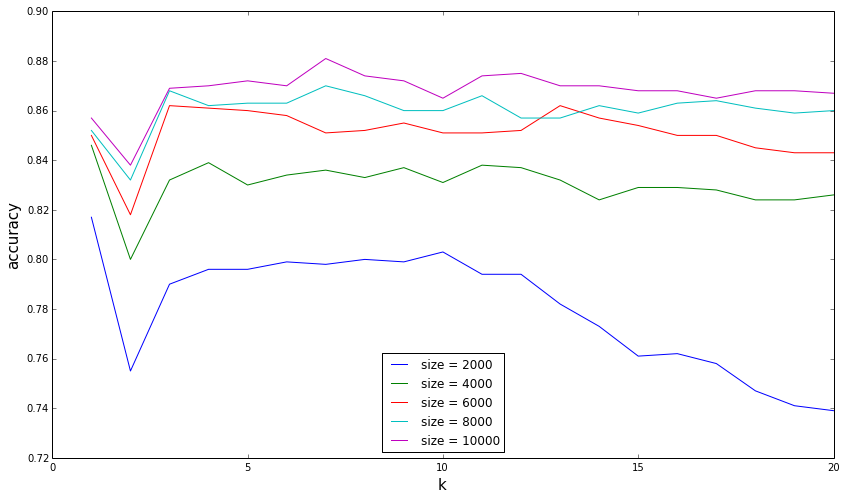

In [65]:
plt_accuracy = accuracy_drawer("knn1.txt")
plt_accuracy.show()

–ü–æ –¥–∞–Ω–Ω–æ–º—É –≥—Ä–∞—Ñ–∏–∫—É –≤–∏–¥–Ω–æ, —á—Ç–æ –ø—Ä–∏ k = 2 –æ—à–∏–±–∫–∞ –ø—Ä–∏ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ —Å–∞–º–∞—è  –±–æ–ª—å—à–∞—è. –≠—Ç–æ –æ–±—ä—è—Å–Ω—è–µ—Ç—Å—è —Ç–µ–º, —á—Ç–æ –ø–æ –¥–µ—Ñ–æ–ª—Ç—É weights = 'uniform', —Ç–æ –µ—Å—Ç—å –ø—Ä–∏ –∑–∞–ø—É—Å–∫–µ KNeighborsClassifier –≤–µ—Å–∞–º –≤—Å–µ—Ö –æ–±—ä–µ–∫—Ç–æ–≤ –ø—Ä–µ–¥–ø–æ–ª–∞—é—Ç—Å—è –æ–¥–∏–Ω–∞–∫–æ–≤—ã–º–∏. –≠—Ç–æ —Å–æ–∑–¥–∞–µ—Ç –ø—Ä–æ–±–ª–µ–º—ã –Ω–∞ –≥—Ä–∞–Ω–∏—Ü–∞—Ö –∫–ª–∞—Å—Å–æ–≤. –ö–æ–≥–¥–∞ –¥–≤–∞ –±–ª–∏–∂–∞–π—à–∏—Ö —Å–æ—Å–µ–¥–∞ –∏–∑ —Ä–∞–∑–Ω—ã—Ö –∫–ª–∞—Å—Å–æ–≤. 

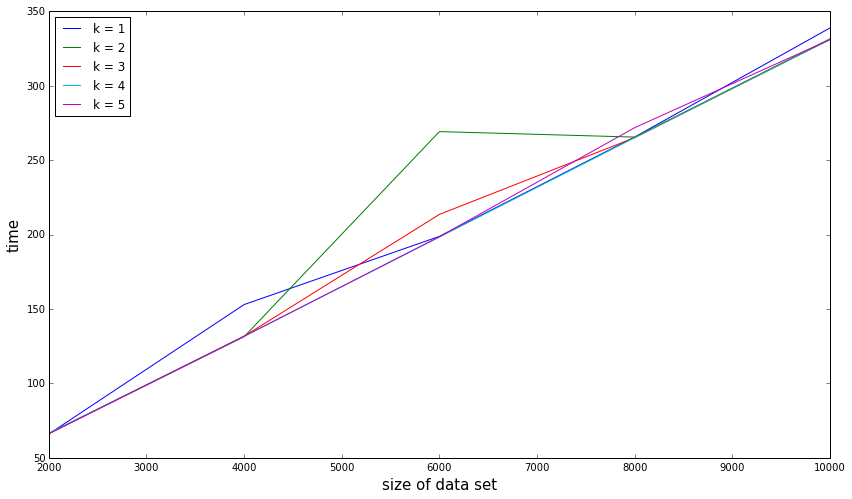

In [67]:
plt_time = time_drawer("knn1.txt")
plt_time.show()

–ú–æ–∂–Ω–æ –ø–æ–¥—É–º–∞—Ç—å –Ω–∞–¥ —Ä–∞–∑–Ω—ã–º–∏ –º–µ—Ç–æ–¥–∞–º–∏ —É–ª—É—á—à–µ–Ω–∏—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏. –ù–∞–ø—Ä–∏–º–µ—Ä, –Ω–∞–π—Ç–∏ —Å–∞–º—ã–π –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–π k, –≤—ã—Ö–æ–¥—è—â–∏–π –∑–∞ –ø—Ä–µ–¥–µ–ª—ã –ø–µ—Ä–≤—ã—Ö 20-–∏, –∏—Å–ø–æ–ª—å–∑—É—è LOO, —Ç–∞–∫ –∂–µ –º–æ–∂–Ω–æ –ø–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å –ø–æ–∏–≥—Ä–∞—Ç—å—Å—è —Å –º–µ—Ç—Ä–∏–∫–æ–π –∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —á—Ç–æ-—Ç–æ –¥—Ä—É–≥–æ–µ, –≤–º–µ—Å—Ç–æ –µ–≤–∫–ª–∏–¥–æ–≤–∞ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è. –ö—Ä–æ–º–µ —Ç–æ–≥–æ, –º–æ–∂–Ω–æ –∑–∞–Ω—è—Ç—å—Å—è –æ—Ç–±–æ—Ä–æ–º —ç—Ç–∞–ª–æ–Ω–æ–≤ –∏ –æ—Ç–±—Ä–æ—Å–∏—Ç—å —á–∞—Å—Ç—å —à—É–º–æ–≤—ã—Ö —ç–ª–µ–º–µ–Ω—Ç–æ–≤.

–î–∞–ª–µ–µ –ø–æ–ø—ã—Ç–∞–µ–º—Å—è –∏–∑–±–∞–≤–∏—Ç—å—Å—è –æ—Ç —à—É–º–∞ –Ω–æ–≤—ã–º–∏ —Ä–∞–∑–±–∏–µ–Ω–∏—è–º–∏ –Ω–∞ —Ç–µ—Å—Ç–æ–≤—É—é –∏ –æ–±—É—á–∞—é—â—É—é –≤—ã–±–æ—Ä–∫–∏. –ò –∑–∞–ø—É—Å–∫–æ–º knn_algorithm.

In [ ]:
step = 10000
for k in range(2, 5):
    X_test = dtrain[step*k:step*k+1000]
    y_test = dlabels[step*k:step*k+1000]
    result = []
    for j in range(1, 6):
        for i in range(1, 21):
            result.append(knn_algorithm(dtrain, dlabels, X_test, y_test, start=step*(k-1), 
                                            end=2000*j+step*(k-1), n_neighbors=i, algorithm='brute'))
    pd.DataFrame(result).to_csv('knn{}.txt'.format(k), sep=' ', index=False, header=False, mode='a')

    

–£—Å—Ä–µ–¥–Ω–∏–º –ø–æ–ª—É—á–µ–Ω–Ω—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã.

In [15]:
average = np.array(pd.read_csv('knn1.txt', header = None, sep = '\\s+'))
average = average[:, 1:]
for data_set_number in range(2, 5):
    average += np.array(pd.read_csv('knn{}.txt'.format(data_set_number), header = None, sep = '\\s+'))
pd.DataFrame(average/5).to_csv('knn_average.txt', sep=' ', index=False, header=False, mode='a')


–í–æ-–ø–µ—Ä–≤—ã—Ö —Å—Ä–∞–≤–Ω–∏–≤–∞—è –¥–∞–Ω–Ω—ã–π –≥—Ä–∞—Ñ–∏–∫ —Å –ø–µ—Ä–≤—ã–º, –Ω–µ —Ç—Ä—É–¥–Ω–æ –∑–∞–º–µ—Ç–∏—Ç—å, —á—Ç–æ —ç—Ç–æ—Ç –±–æ–ª–µ–µ —Å–≥–ª–∞–∂–µ–Ω–Ω—ã–π, –∏ –≤ –æ—Ç–ª–∏—á–∏–µ –æ—Ç –ø–µ—Ä–≤–æ–≥–æ –≥—Ä–∞—Ñ–∏–∫–∞, –≤ –∫–æ—Ç–æ—Ä–æ–º —à—É–º—ã –∏–º–µ–ª–∏ –±–æ–ª—å—à–æ–µ –≤–ª–∏–Ω–∏–µ, —Ç—É—Ç —ç—Ç–æ –æ—Ç—Ä–∞–∂–∞–µ—Ç—Å—è –Ω–µ —Ç–∞–∫ –∫—Ä–∏—Ç–∏—á–Ω–æ –∏, –Ω–∞–ø—Ä–∏–º–µ—Ä, –≤ –¥–∞–Ω–Ω–æ–º —Å–ª—É—á–∞–µ –∫—Ä–∏–≤—ã–µ –Ω–µ –ø–µ—Ä–µ—Å–µ–∫–∞—é—Ç—Å—è. –í–æ-–≤—Ç–æ—Ä—ã—Ö, –º–æ–∂–Ω–æ –≤—ã–¥–µ–ª–∏—Ç—å –Ω–∞–∏–ª—É—á—à–∏–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç –≤ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏(89.83%). –û–Ω –¥–æ—Å—Ç–∏–≥–∞–µ—Ç—Å—è –Ω–∞ 7NN.

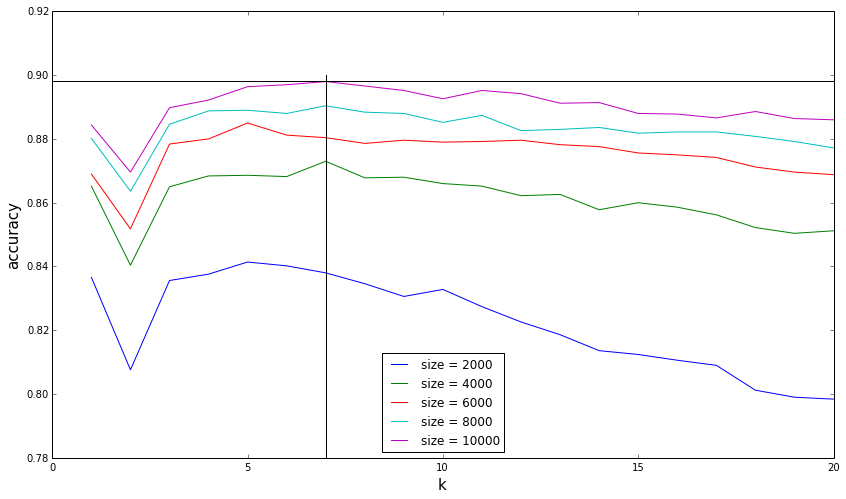

In [69]:
plt_accuracy = accuracy_drawer("knn_average.txt")
plt_accuracy.plot([7, 7], [0.78, 0.90], 'k-')
plt_accuracy.plot([0, 20], [0.8983, 0.8983], 'k-')
plt_accuracy.show()

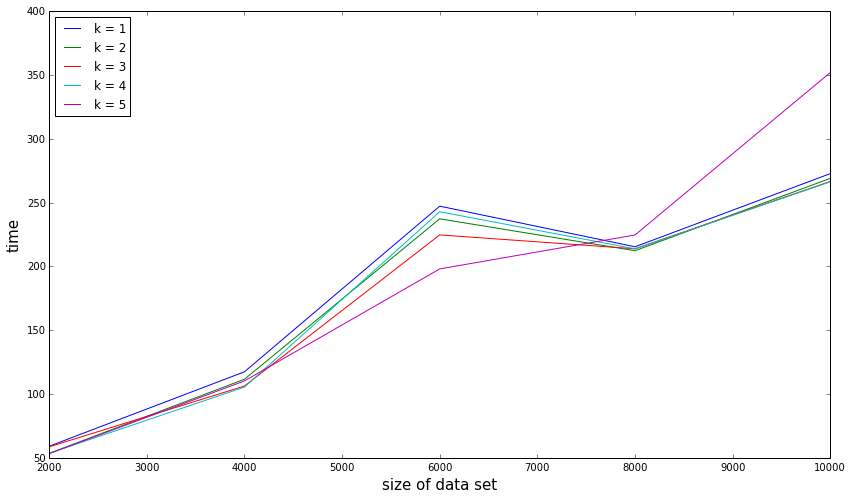

In [70]:
plt_time = time_drawer("knn_average.txt")
plt_time.show()

–í –∑–∞–∫–ª—é—á–∏—Ç–µ–ª—å–Ω–æ–π —á–∞—Å—Ç–∏, –¥–∞–Ω–Ω–æ–π –ª–∞–±–æ—Ä–∞—Ç–æ—Ä–Ω–æ–π. –í—ã–±–µ—Ä–µ–º –ª—É—á—à–µ–µ ùëò, –æ–±—É—á–∏–º –Ω–∞ –Ω–µ–º kNN –¥–ª—è —Å–∞–º–æ–π –±–æ–ª—å—à–æ–π
–æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏ –∏ –ø–æ—Å—Ç—Ä–æ–∏–º –¥–ª—è –Ω–µ–≥–æ –º–∞—Ç—Ä–∏—Ü—É –æ—à–∏–±–æ–∫ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ

In [ ]:
X_train = np.array(dtrain[:10000])
y_train = np.array(dlabels[:10000])

model = KNeighborsClassifier(n_neighbors=7, algorithm='brute')
model.fit(X_train, y_train)
pd.DataFrame(model.predict(X_test)).to_csv("7NN_predictions.txt", sep=' ', index=False, header=False, mode='a')

–ó–¥–µ—Å—å —Å–æ–∑–¥–∞–¥–∏–º —Ñ—É–Ω–∫—Ü–∏—é –¥–ª—è –æ—Ç—Ä–∏—Å–æ–≤—ã–≤–∞–Ω–∏—è –º–∞—Ç—Ä–∏—Ü—ã –æ—à–∏–±–æ–∫. –ù–∞ –≤—Ö–æ–¥ –æ–Ω–∞ –ø—Ä–∏–Ω–∏–º–∞–µ—Ç –ø—É—Ç—å –∫ —Ñ–∞–π–ª—É —Å —Å—ã—Ä—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏ –∏ –∑–∞—Ç–µ–º —Å–æ–∑–¥–∞–µ—Ç –º–∞—Ç—Ä–∏—Ü—É –æ—à–∏–±–æ–∫ –∏ –Ω–æ—Ä–º–∞–ª–∏–∑—É–µ—Ç –µ–µ, –∞ –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç –æ–±—ä–µ–∫—Ç plt —Å –≤–∏–∑—É–∞–ª–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω–æ–π –º–∞—Ç—Ä–∏—Ü–µ–π.

In [102]:
def error_normalized_matrix_plot(file_path):
    y_predicted = pd.read_csv(file_path, header = None, sep = '\\s+')
    error_matrix = confusion_matrix(y_test, y_predicted)
    em_normalized = cm.astype('float') / error_matrix.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(14,8))
    plt.ylabel("real labels", fontsize=12)
    plt.xlabel("predicted labels", fontsize=12)
    plt.title('Normalized Confusion Matrix', fontsize=15)
    plt.imshow(em_normalized, interpolation='none')
    return(plt)

–ü–æ –≥—Ä–∞—Ñ–∏–∫—É –≤–∏–¥–Ω–æ, —á—Ç–æ –∫–∞—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –¥–æ–≤–æ–ª—å–Ω–æ —Ö–æ—Ä–æ—à–µ–µ. –¢–∞–∫ –∫–∞–∫ –¥–∏–∞–≥–æ–Ω–∞–ª—å–Ω—ã–µ –∫–≤–∞–¥—Ä–∞—Ç–∏–∫–∏ –±–æ–ª–µ–µ –∫—Ä–∞—Å–Ω—ã–µ, —á—Ç–æ –≥–æ–≤–æ—Ä–∏—Ç –æ —Ç–æ–º, —á—Ç–æ –º–µ—Ç–∫–∏ –∫–ª–∞—Å—Å–æ–≤ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –∏ —Ä–µ–∞–ª—å–Ω—ã—Ö –æ—Ç–≤–µ—Ç–æ–≤ –¥–æ–≤–æ–ª—å–Ω–æ —Ö–æ—Ä–æ—à–æ —Å–æ–≤–ø–∞–¥–∞—é—Ç.  

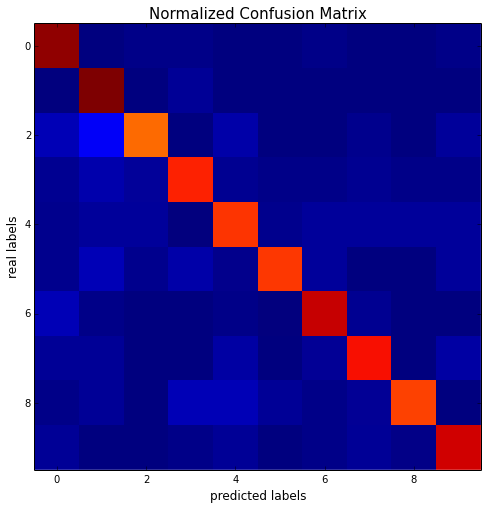

In [103]:
plt_matrix = error_normalized_matrix_plot("7NN_predictions.txt")
plt_matrix.show()